# Initial Data Exploration and Importing Required Libraries

In [1]:
# importing the required libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
# reading the dataset using the read_csv function in pandas

train = pd.read_excel('Data_Train.xlsx')

In [3]:
# checking the first 5 rows of the dataset

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Bangalore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Bangalore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [5]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Data Wrangling

In [6]:
# Combining the Date of Journey and Departure Columns and converting it into Datetime format

train.Date_of_Journey.str.replace('/', '-')
combined = train.Date_of_Journey.str.cat(train.Dep_Time, sep=' ')
train['Date_Time_Dep'] = pd.to_datetime(combined)

In [7]:
# Setting the Datetime column as Index

train.set_index('Date_Time_Dep', inplace=True)

In [8]:
# Finding out null values

train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Dropping all the null value rows
train = train.dropna()

In [10]:
# Replacing the number of Stops in the 'Total_Stops' column with integers

train['Total_Stops'] = train.Total_Stops.str.replace('non-stop', '0')
train['Total_Stops'] = train.Total_Stops.str.replace('1 stop', '1')
train['Total_Stops'] = train.Total_Stops.str.replace('2 stops', '2')
train['Total_Stops'] = train.Total_Stops.str.replace('3 stops', '3')
train['Total_Stops'] = train.Total_Stops.str.replace('4 stops', '4')

In [11]:
# Converting the 'Total_Stops' column from object to integer

train['Total_Stops'] = train.Total_Stops.astype(int)

In [12]:
h = train['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = train['Duration'].str.extract('(\d+)m', expand=False).astype(float)
train['Duration'] = h.add(m, fill_value=0).astype(int)

In [13]:
# Converting Dep_Time from object (string) to time format

train.Dep_Time=pd.to_datetime(train.Dep_Time, format = '%H:%M').dt.time

In [14]:
# String manipulation to extract only hours and minutes from arrival_time column and dropping the date part, then 
# converting the string to time format as done above

train.Arrival_Time=train.Arrival_Time.str.slice(0,6)
train.Arrival_Time=train.Arrival_Time.str.strip()
train.Arrival_Time=pd.to_datetime(train.Arrival_Time, format = '%H:%M').dt.time

In [15]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Date_Time_Dep,,,,,,,,,,,
2019-03-24 22:20:00,IndiGo,24/03/2019,Bangalore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0,No info,3897
2019-01-05 05:50:00,Air India,1/05/2019,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2,No info,7662
2019-09-06 09:25:00,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2,No info,13882
2019-12-05 18:05:00,IndiGo,12/05/2019,Kolkata,Bangalore,CCU → NAG → BLR,18:05:00,23:30:00,325,1,No info,6218
2019-01-03 16:50:00,IndiGo,01/03/2019,Bangalore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1,No info,13302


# Exploratory Data Analysis

## Univariate Analysis

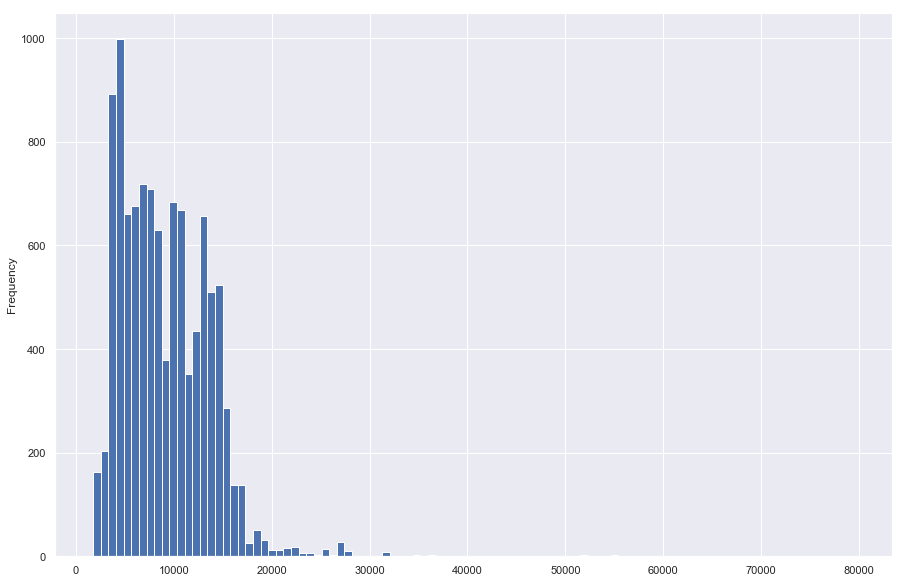

In [16]:
# Plot showing Price trends

train['Price'].plot.hist(figsize=[15,10], bins=100)

Looking at the above **Histogram** is can be seen that around 80% of the flight prices are in between **5000 to 16000**. The peak price for most of the flights is **4000 to 6000**. Also there are some flights having a price above 20000 but those cannot be considered as an outlier since it can be a different class of an Airline.

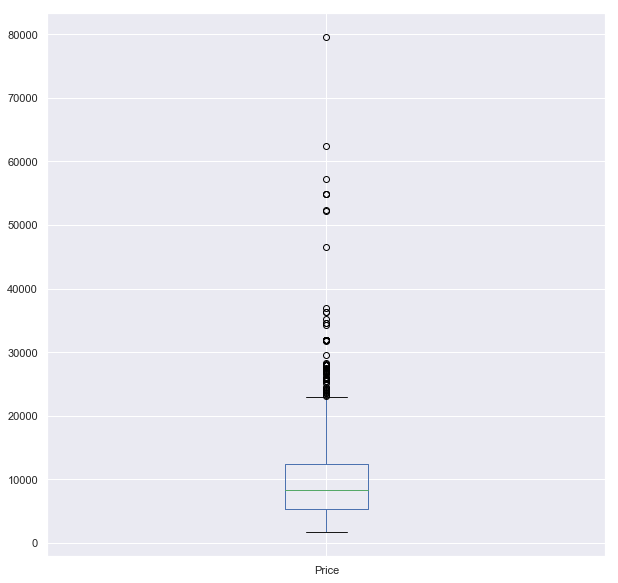

In [17]:
# Boxplot showing Price spread

train['Price'].plot.box(figsize=[10,10])

From the above **Boxplot** it is clear that the flight prices are from a range of **1759 to 79512** having a mean of **9087**. Again the maximum Price of **79512** is because of the class of the Airline. The higher Price suggests that the Airline is providing a Luxury or Business Class service for their passengers. But most of the Price of the flight tickets lie in the range of **5000 to 12000**.

Text(0, 0.5, 'Frequency')

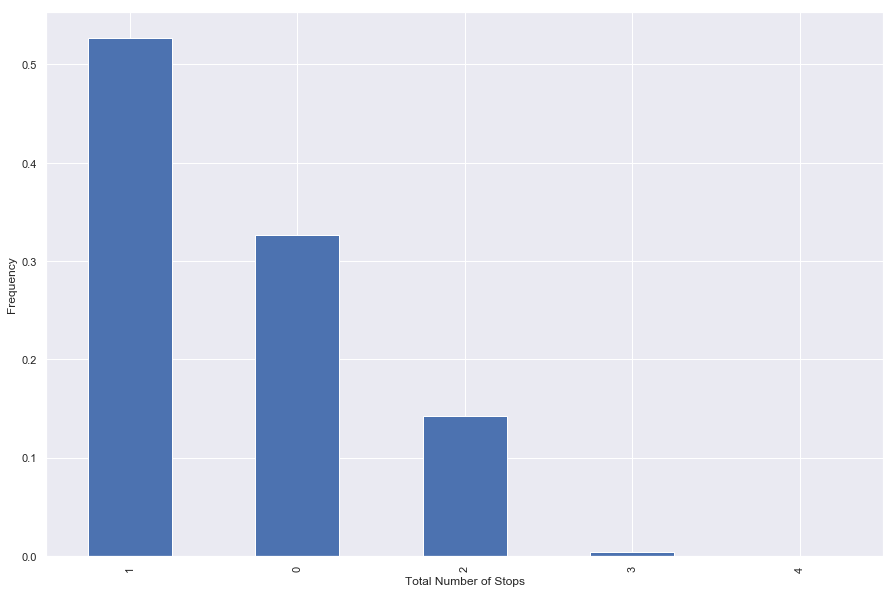

In [18]:
# Plot showing the frequency of total number of stops of the flights

train['Total_Stops'].value_counts(normalize=True).plot.bar(figsize=[15,10])
plt.xlabel('Total Number of Stops')
plt.ylabel('Frequency')

As it can be seen from the **Barplot** here the flights that have 1 stop are highest in number followed by flights with 0 stop and then 2 stops respectively. This trend shows that in India most of the flights are connecting flights with **1 stop** having a frequency of **52.66%** followed by **32.68%** flights with **0 stops** and **14.23%** flights with **2 stops**. Also there are very less number of flights with 3 stops and one single flight having 4 stops.

Text(0, 0.5, 'Airlines')

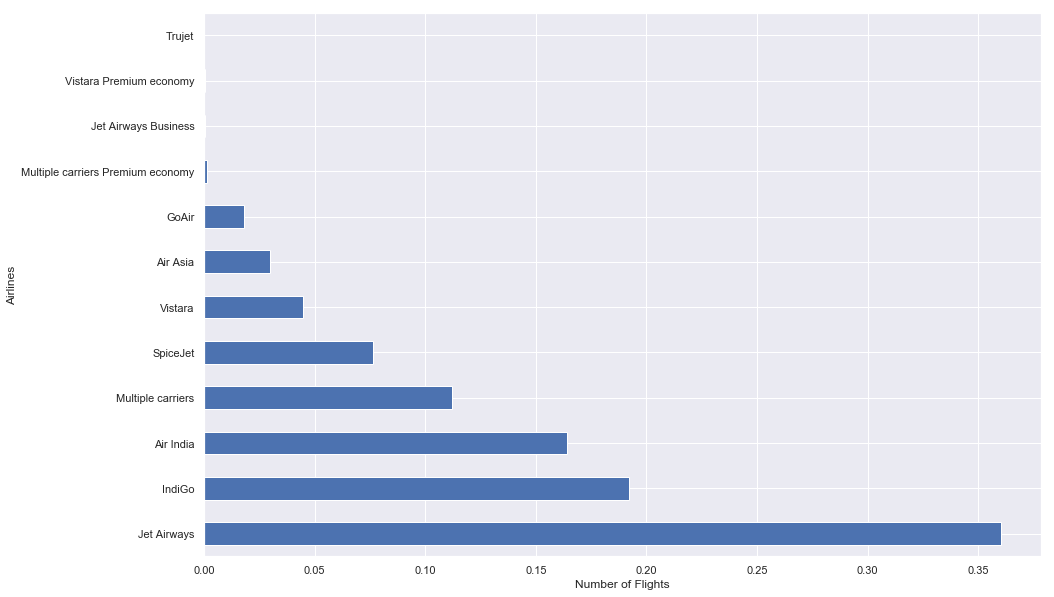

In [19]:
# Plot showing which airline has how much number of flights

train['Airline'].value_counts(normalize=True).plot.barh(figsize=[15,10])
plt.xlabel('Number of Flights')
plt.ylabel('Airlines')

This is a **Horizontal Barplot** showing the Number of Flights of different Airlines in the dataset. The highest number of flights are of **Jet Airways** with a share of approxiamately **36%**. This suggest that **1/3rd** proportion of the flights in India are of **Jet Airways**. These can be direct or flights with 1 or 2 stops. The next top Airline in India is **IndiGo** with **19.22%** very closely follows the **Air India** airlines with **16.4%** flights in the market. The other airlines economical airlines such as **SpiceJet**, **Vistara**, **Air Asia**, **GoAir** shows that they don't have much connectivity in India.

Text(0.5, 0, 'Duration')

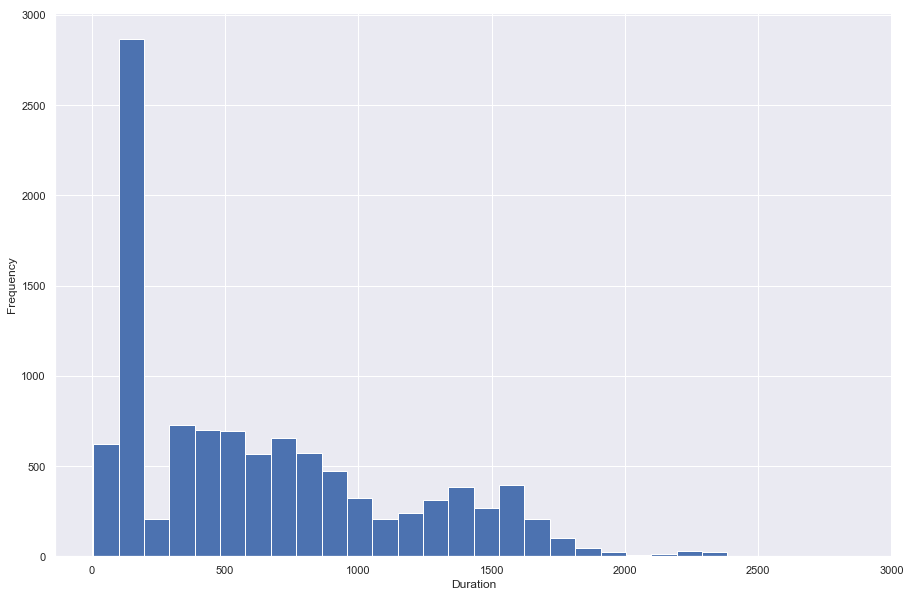

In [20]:
# Plot showing the trend in Duration of flights

train['Duration'].plot(kind='hist', bins=30, figsize=[15,10])
plt.xlabel('Duration')

The highest number of flights are of **Duration** within **100-200 minutes** that is **1.40 to 3.20 hours**. Also there are certain number of flights between **300 to 1000 minutes**. It show that people mostly prefer flights with less Duration but also lot of the population takes connecting flight to reach smaller places around India.

## Bivariate Analysis

Text(0, 0.5, 'Airlines')

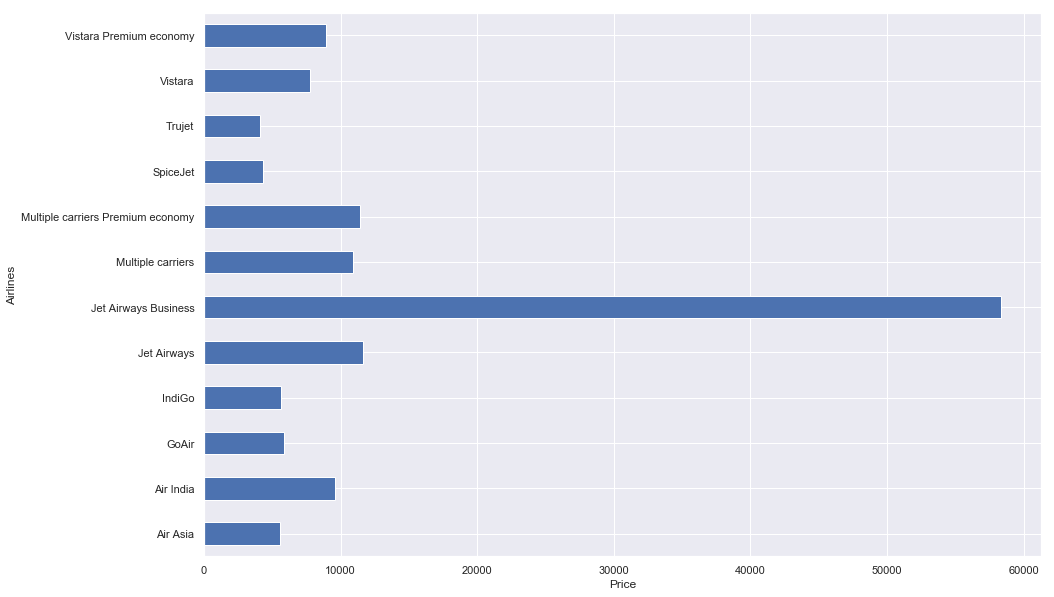

In [21]:
# Plot relating to different Airlines and their Price

train.groupby('Airline')['Price'].mean().plot.barh(figsize=[15,10])
plt.xlabel('Price')
plt.ylabel('Airlines')

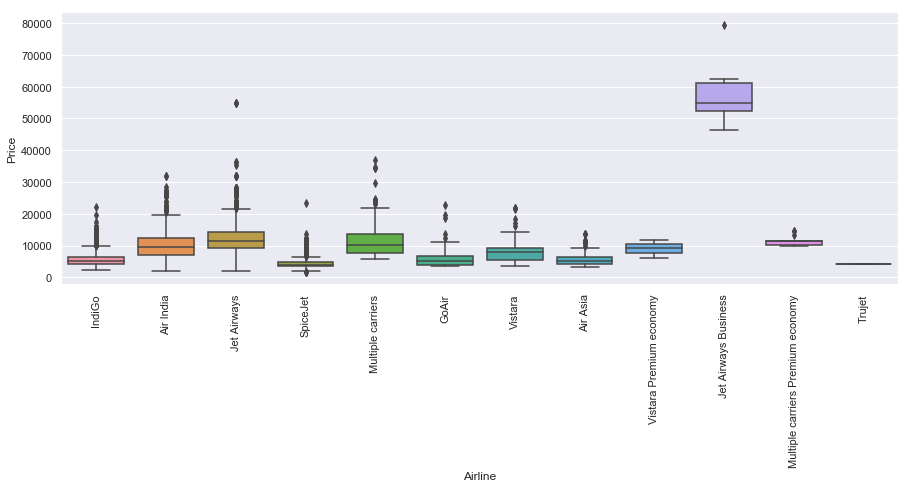

In [22]:
# Boxplot showing the Spread of the Price of different Airlines

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Airline, train.Price)

It can be observed here that **Jet Airways Business** airline has the costliest ticket in India. But all other **Economical Airlines** have their ticket price within **10000**. In the **Boxplot** every airline is having certain number of outlier but those are present there because of **Total Stops** of the flight. The number of stops increases the flight ticket price increases accordingly.

Text(0, 0.5, 'Price')

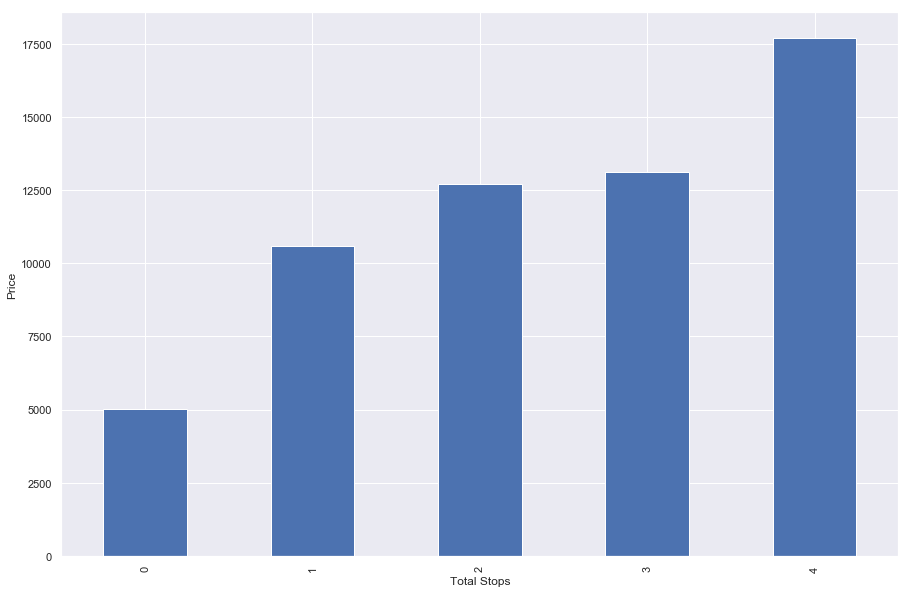

In [23]:
# Bar plot showing the trends in Price with resprct to number of Stops

train.groupby('Total_Stops')['Price'].mean().plot.bar(figsize=[15,10])
plt.xlabel('Total Stops')
plt.ylabel('Price')

Text(0.5, 0, 'Total Stops')

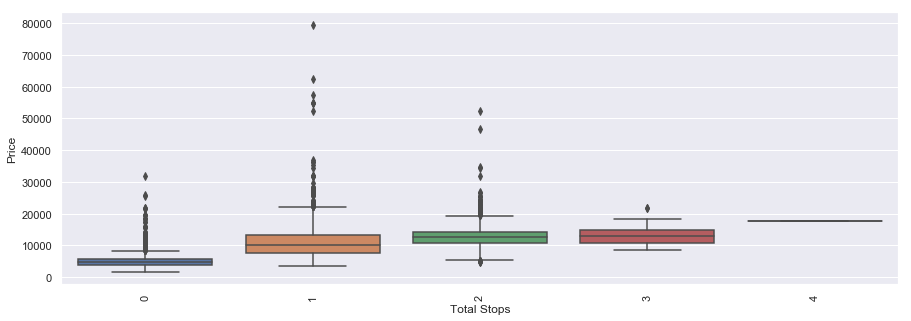

In [24]:
# Boxplot showing the spread of Price with respect to number of stops

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Total_Stops, train.Price)
plt.xlabel('Total Stops')

It is very obvious that flights with more stops will have higher price but it can be shown here in practical sense the mean Price of the flights having more than 3 stops is higher than those with 2 or less stops. Also from the **Boxplot** it can be summarized that there are certain number of flights with extreme ticket price and the reason behind that could be **Duration** or **Class of the Airline**. 

Text(0, 0.5, 'Price')

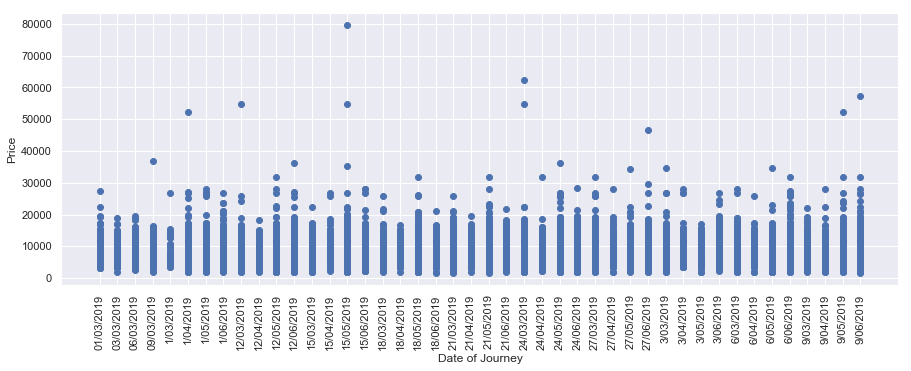

In [25]:
# Scatter plot of Price with respect to Date of Journey

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.scatter(train.Date_of_Journey.sort_values(), train.Price)
plt.xlabel('Date of Journey')
plt.ylabel('Price')

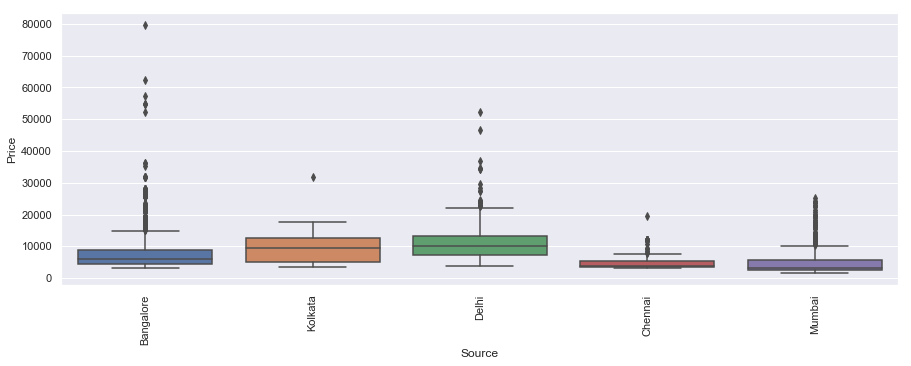

In [26]:
# Boxplot showing the spread of Price for different Source of the flights

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Source, train.Price)

This is a **Boxplot** showing the **Price** trends with the **Source** of the flights. It can be observed that flights taking off from **Bangalore** have certain extreme ticket price suggesting that most **Luxury Class Airlines** flights fly from **Bangalore** and closely followed is **Delhi**. The other places that are **Kolkata**, **Chennai** and **Mumbai** seem to have **Economical Flights** flying out these cities.

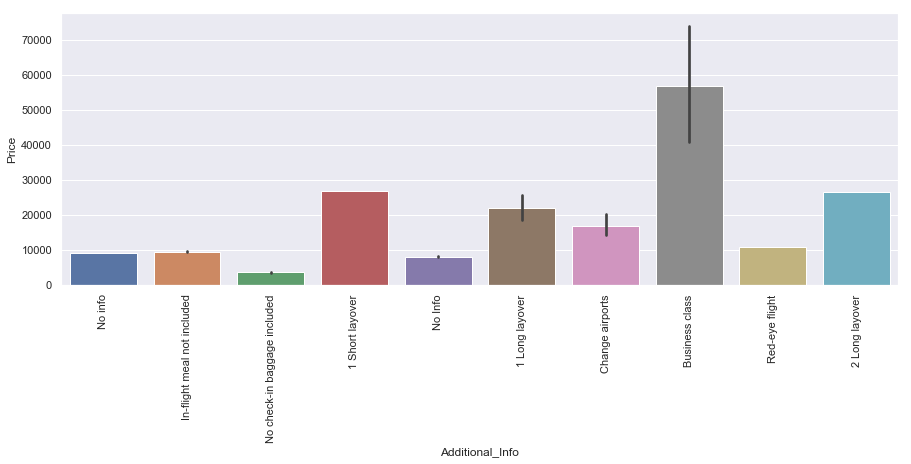

In [27]:
# Plot showing Additional details and the trends in Price of the tickets based on those

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(train.Additional_Info, train.Price )

From this **Bar Plot** we can truely come to the conclusion that **Business Class** ticket price is on the higher side. Also there is an unusual trend seen here that **1 Short Layover** and **2 Long Layover** have approximate similar price range. This can be because of many different reasons that during **2 Long layover** there would be multiple carriers of Airlines included. You cannot exactly tell the reason behind this trend.

Text(0, 0.5, 'Price')

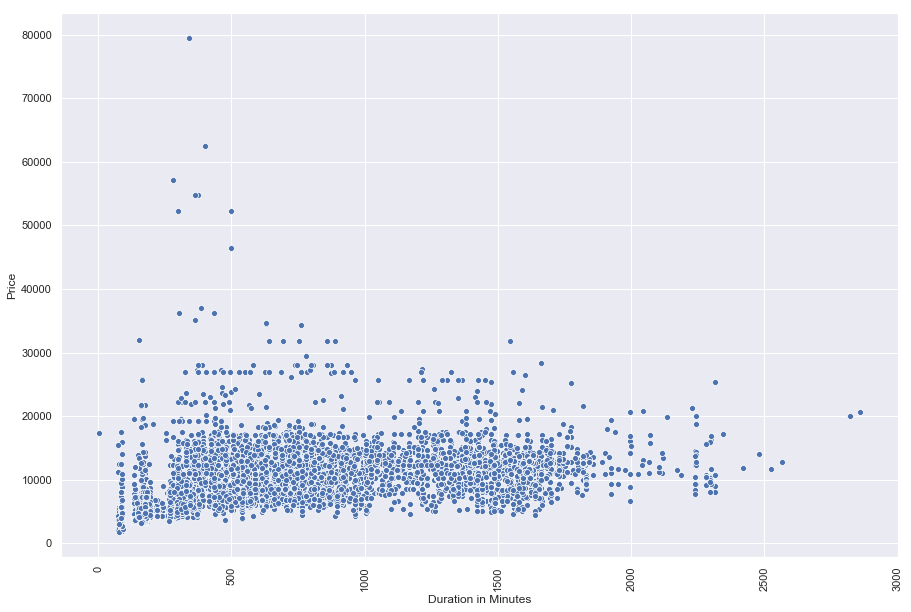

In [28]:
# Scatter plots showing the trends in Price with respect to Duration of the flight

plt.subplots(figsize=[15,10])
plt.xticks(rotation=90)
sns.scatterplot(train.Duration, train.Price)
plt.xlabel('Duration in Minutes')
plt.ylabel('Price')

The **Scatter Plot** shows the trends of **Price** of the tickets with respect to the **Duration** of the flight. There are certain flights with less duration having more price and certain other flights with more duration and less price. But most of the Price is concentrated from **300 to 1600 minutes** duration of the flights. There is a slight incresing trend of **Price** with increase in **Duration**.

Text(0.5, 0, 'Departure Time')

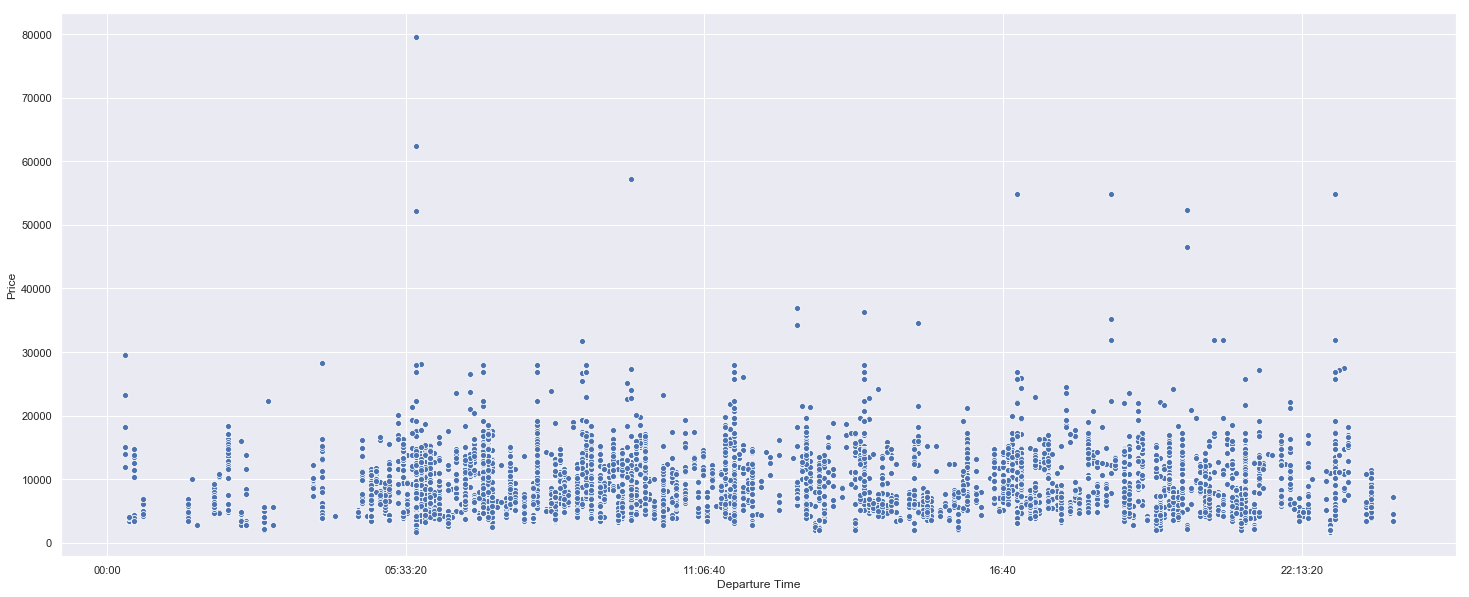

In [29]:
# Plot showing number of flights at different time to the day and their Price accordingly

plt.subplots(figsize=[25, 10])
sns.scatterplot(x='Dep_Time', y='Price', data=train)
plt.xlabel('Departure Time')

The **Scatter Plot** clearly shows that the frequency of flights is the most from **5:30 Am to 11 AM** and again from **4:30 PM to 10 PM**. It obviously gives a clear trend that people mostly would prefer early morning to afternoon flights and again the evening flights. These times most of the people who are travelling for work can be seen on the flights. Also there are very few **Domestic Flights** operating in India during the **Midnight**. This suggests that there are very less flyers in the night times and most of the people prefer Daytime flights.

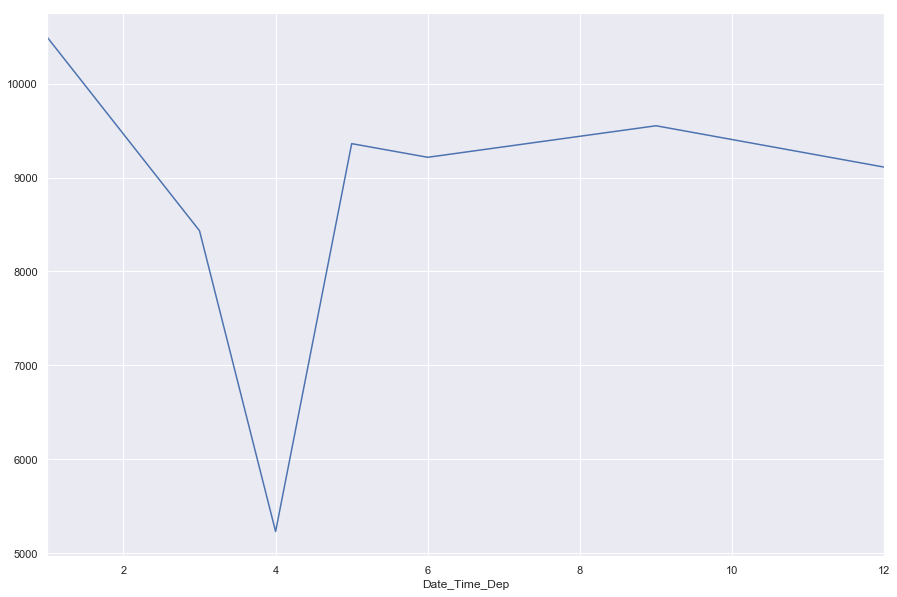

In [30]:
# Line plot showing the trend in Price of tickets during each month

plt.subplots(figsize=[15,10])
month_of_dep = train.groupby(train.index.month).Price.mean()
month_of_dep.plot()

This plot shows that the **Price** of the tickets **decreases** during the months of **March-April** and again **increases** after **April** and is stable after that.

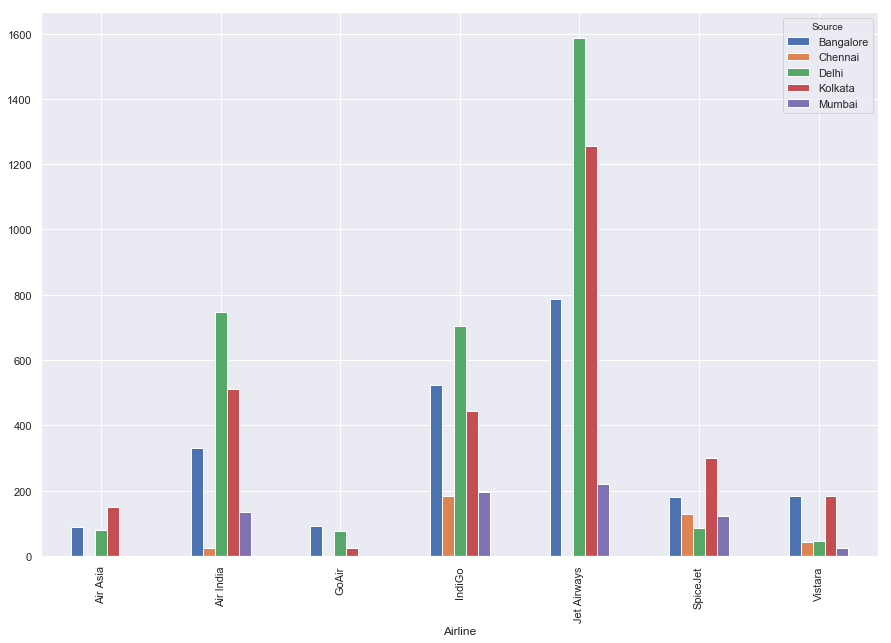

In [31]:
# Plot showing Airlines at different Source cities

table = pd.crosstab(train.Airline, train.Source)
table = table.loc[['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'SpiceJet', 'Vistara']]
table.plot(kind='bar', figsize=[15,10])

In this plot it can be seen the number of flights that take off for each Airlines in different cities of India. **Jet Airways** tops the list with most number of flights taking off from **Delhi** which is then followed by **Air India** and **IndiGo**. **Kolkata** has **2nd** highest number of flights of **Jet Airways** taking off from there with other few airlines **Air India**, **IndiGo** with less flights than **Jet Airways**. **Bangalore** again has a decent number of flights of **Jet Airways** and **IndiGo**. From **Chennai** it can be seen that there are very low or nil number of flights of **Air Asia**, **GoAir** and **Jet Airways** airlines. 

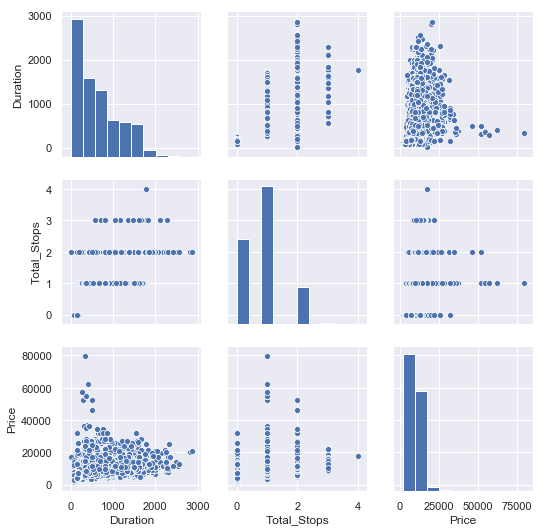

In [32]:
# Pairplot to show trends in different parameters of the flight

sns.pairplot(train)